In [123]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

# libraries for encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# libraries for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


# libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# scipy.stats for hyperparameter tuning
from scipy import stats


%matplotlib inline

In [2]:
df = pd.read_csv("KOPA.csv")
df

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Product A,Female,Location 30,Region 2,20250,6/30/2016,2000,50,365,3601,4301,20250,Finished Payment
9191,Product D,Female,Location 57,Region 6,20250,8/4/2013,2000,50,365,4001,5501,20250,Finished Payment
9192,Product B,Female,Location 8,Region 2,16600,6/14/2014,2000,40,365,3401,4601,16600,Finished Payment
9193,Product B,Male,Location 4,Region 4,16600,12/29/2014,2000,40,365,3400,4600,16600,Finished Payment


In [3]:
df.shape

(9195, 13)

The kopa dataset has `13 columns` and `9195 rows`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         9195 non-null   object
 1   CustomerGender  9195 non-null   object
 2   Location        9195 non-null   object
 3   Region          9195 non-null   object
 4   TotalPrice      9195 non-null   int64 
 5   StartDate       9195 non-null   object
 6   Deposit         9195 non-null   int64 
 7   DailyRate       9195 non-null   int64 
 8   TotalDays       9195 non-null   int64 
 9   AmountPaid30    9195 non-null   int64 
 10  AmountPaid60    9195 non-null   int64 
 11  AmountPaid360   9195 non-null   int64 
 12  LoanStatus360   9195 non-null   object
dtypes: int64(7), object(6)
memory usage: 934.0+ KB


From the above output of the `.info()`:
* there are 9195 instances with a total of 13 features
* Seems that this dataset has no missing values, with `7 numerical columns` and the rest being objects(text)
  
We can further explore the columns with object datatype

In [5]:
# The product column
df['Product'].value_counts()

Product
Product B    3862
Product A    3141
Product C     999
Product D     975
Product E     213
Product F       5
Name: count, dtype: int64

the output shows that the product column has 6 categories with different counts in each category

In [6]:
df['LoanStatus360'].value_counts()

LoanStatus360
Active              6742
Finished Payment    1604
Blocked              849
Name: count, dtype: int64

`LoanStatus` being our label for the classifications, has 3 categories - Active, - Finished Payment, - Blocked

Active seems to have more instances compare to the other 2 categories

We can also explore the numerical features:

In [7]:
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


the `describe()` function returns the following:
* `count` that represents the number of instances of that feature in the dataset, that is, `9195` for each feature since there are no missing values
* `mean` showing the average of each feature
* `std` shows how the values are dispersed from the mean
* `min` and `max` showing the minimum and maximum value for each feature
* `percentiles`

for a deeper view of the data, we can use histograms:

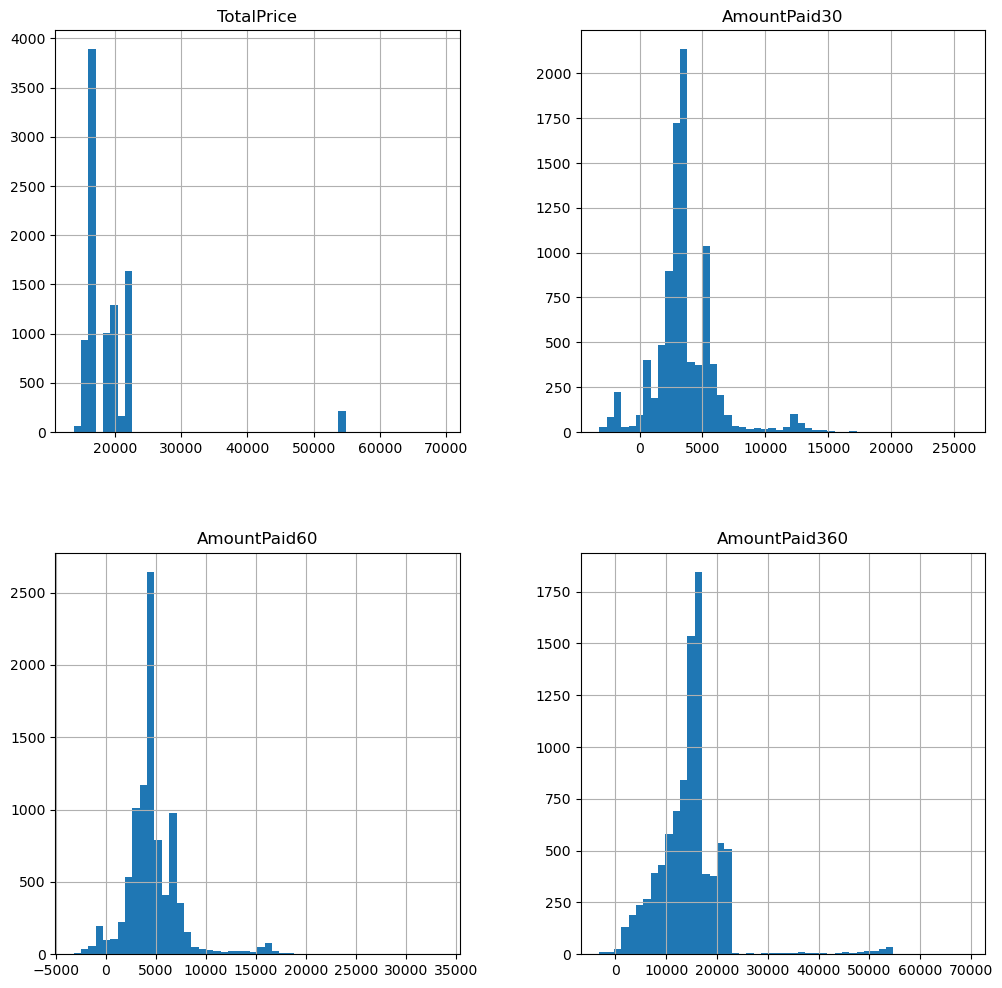

In [24]:
df.hist(column=['TotalPrice', 'AmountPaid30', 'AmountPaid60', 'AmountPaid360'],bins=50, figsize=(12, 12))
plt.show()

From the histogram above:
* The attributes have different scales, which can be fixed with feature scaling
* Most of the attibutes have outliers, which will be fixed later on
* Most of the repayments at the end of the year are ranging 1000 - 20000 ksh

We can now observe how people repay their loan and how they are classified

In [9]:
blocked = df[df['LoanStatus360'] == 'Blocked']
blocked

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
6742,Product A,Female,Location 149,Region 1,22250,2/11/2016,4000,50,365,4000,4000,4700,Blocked
6743,Product A,Female,Location 3,Region 3,19250,10/8/2015,1000,50,365,370,370,570,Blocked
6744,Product C,NotSpecified,Location 188,Region 6,15600,11/19/2012,1000,40,365,4500,4500,9300,Blocked
6745,Product B,Female,Location 45,Region 3,16600,7/16/2014,2000,40,365,3120,4360,7670,Blocked
6746,Product D,Male,Location 189,Region 5,20250,8/31/2013,2000,50,365,2801,2801,2801,Blocked
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,Product A,Female,Location 62,Region 3,20250,12/27/2015,2000,50,365,701,801,4101,Blocked
7587,Product A,Male,Location 108,Region 6,22250,7/15/2015,4000,50,365,4050,4800,8050,Blocked
7588,Product B,Female,Location 21,Region 7,16600,12/21/2014,2000,40,365,3471,4671,5501,Blocked
7589,Product D,Male,Location 352,Region 1,20250,4/29/2013,2000,50,365,3369,4672,6459,Blocked


In [10]:
blocked = df[df['LoanStatus360'] == 'Active']
blocked

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,Product B,Male,Location 23,Region 4,16600,5/5/2015,2000,40,365,2681,3781,14100,Active
6738,Product B,Male,Location 40,Region 6,16600,4/27/2014,2000,40,365,2811,3291,6431,Active
6739,Product B,Male,Location 70,Region 7,16600,8/23/2014,2000,40,365,4600,6200,16260,Active
6740,Product A,Male,Location 3,Region 3,19250,5/8/2016,1000,50,365,-2250,-1000,11850,Active


From the above dataframe:
* if the customer fails to continue paying their loan after more than 30 days their account gets `Blocked`
* if the customer continues to actively repay their loan the status stays `Active`
* if they complete their payment the status is `Finished Payment`

The data seems to have 2 outputs:
* `AmountPaid360` - meaning it's a regression problem
* `LoanStatus360` - meaning it's also a classification problem

Before we continue with visualizations we can split the data into train and test set:

### Regression

In [11]:
df_reg = df.copy()

In [12]:
# determining if our dataset is imbalanced
class_percentages = df['LoanStatus360'].value_counts(normalize=True) * 100
class_percentages

LoanStatus360
Active              73.322458
Finished Payment    17.444263
Blocked              9.233279
Name: proportion, dtype: float64

Majority classes comprises over 70% and minority class is below 10%, meaning our data is imbalanced, we'll use `StratifiedSampling` to split the data

In [13]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index  in split.split(df_reg, df_reg['LoanStatus360']):
    strat_train_set = df_reg.loc[train_index]
    strat_test_set = df_reg.loc[test_index]

In [25]:
strat_test_set.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
4493,Product A,Female,Location 22,Region 6,22250,5/24/2015,4000,50,365,5750,7150,21500,Active
3763,Product C,Female,Location 27,Region 2,15600,3/10/2013,1000,40,365,5500,5500,10680,Active
6871,Product A,Male,Location 18,Region 7,19250,12/10/2015,1000,50,365,-450,-450,-450,Blocked
3452,Product A,Male,Location 22,Region 6,22250,2/18/2016,4000,50,365,5300,7000,16880,Active
4551,Product B,Male,Location 44,Region 1,16600,1/10/2015,2000,40,365,3481,4321,15280,Active


#### Visualizations of the `AMOUNTPAID360` feature

In [14]:
df_reg_vis = strat_train_set.copy()

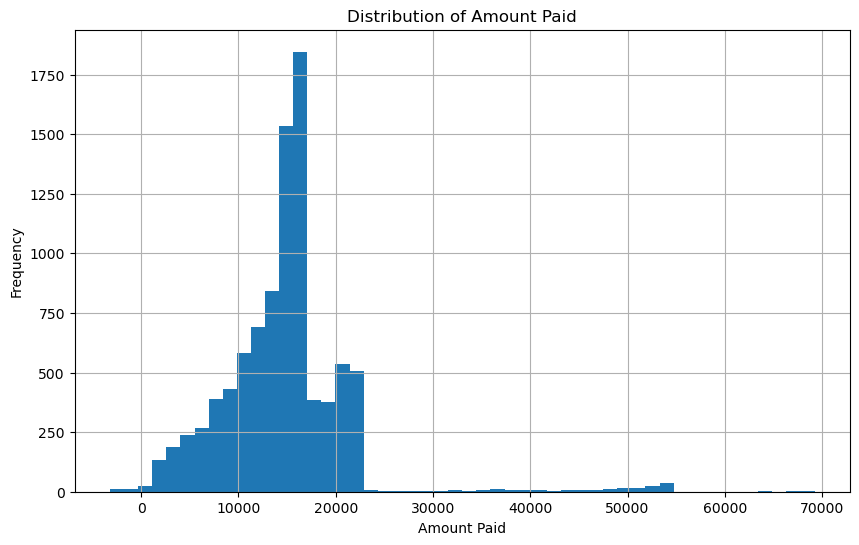

In [15]:
df_reg['AmountPaid360'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Amount Paid')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Paid')
plt.show()

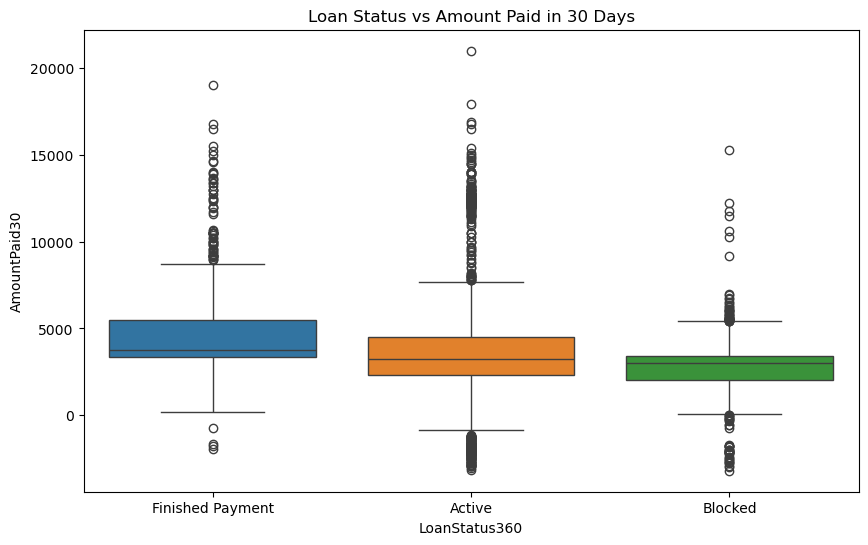

In [16]:
# Amount paid30 vs loanstatus
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid30", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 30 Days")
plt.show()

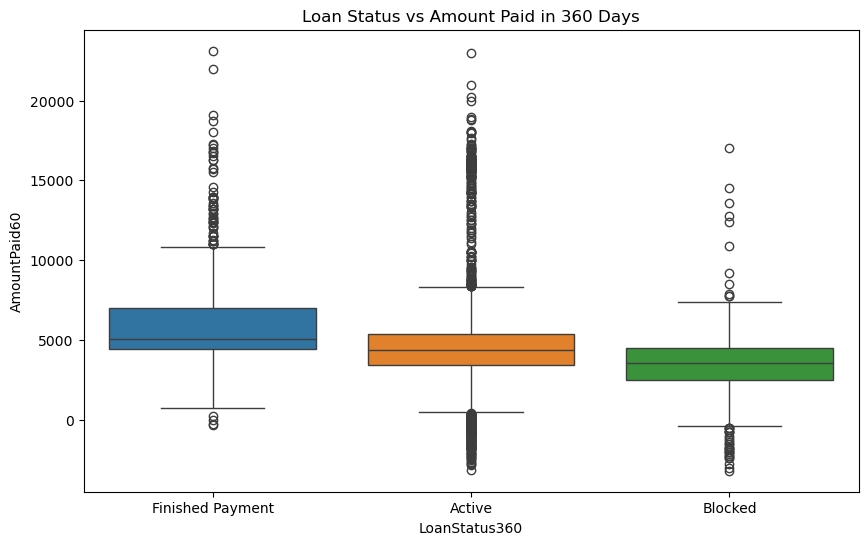

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid60", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 360 Days")
plt.show()

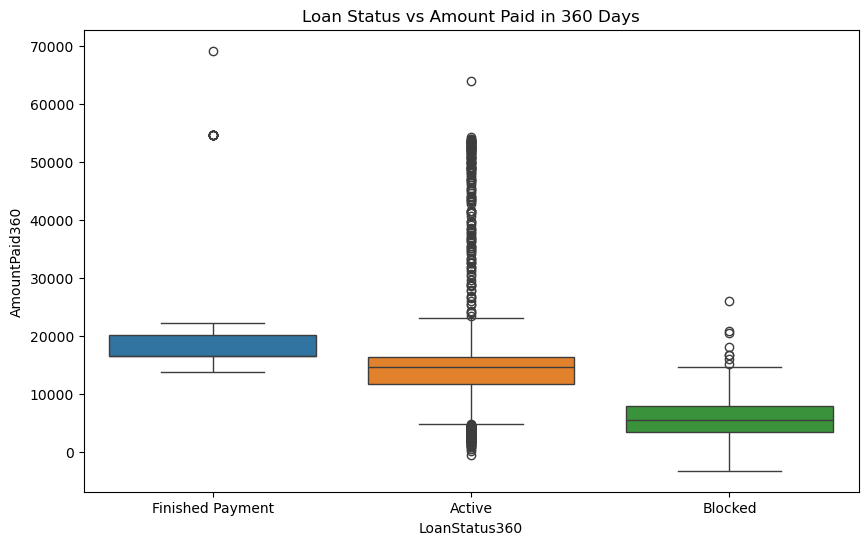

In [18]:
# Amount paid vs LoanStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid360", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 360 Days")
plt.show()

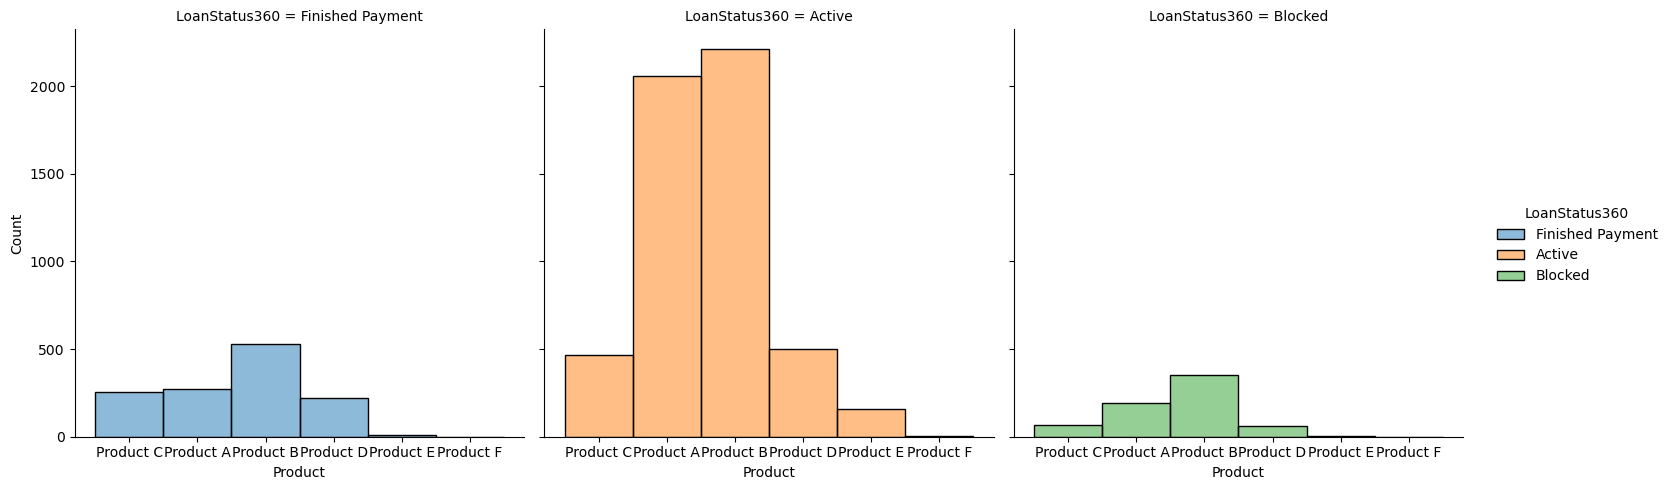

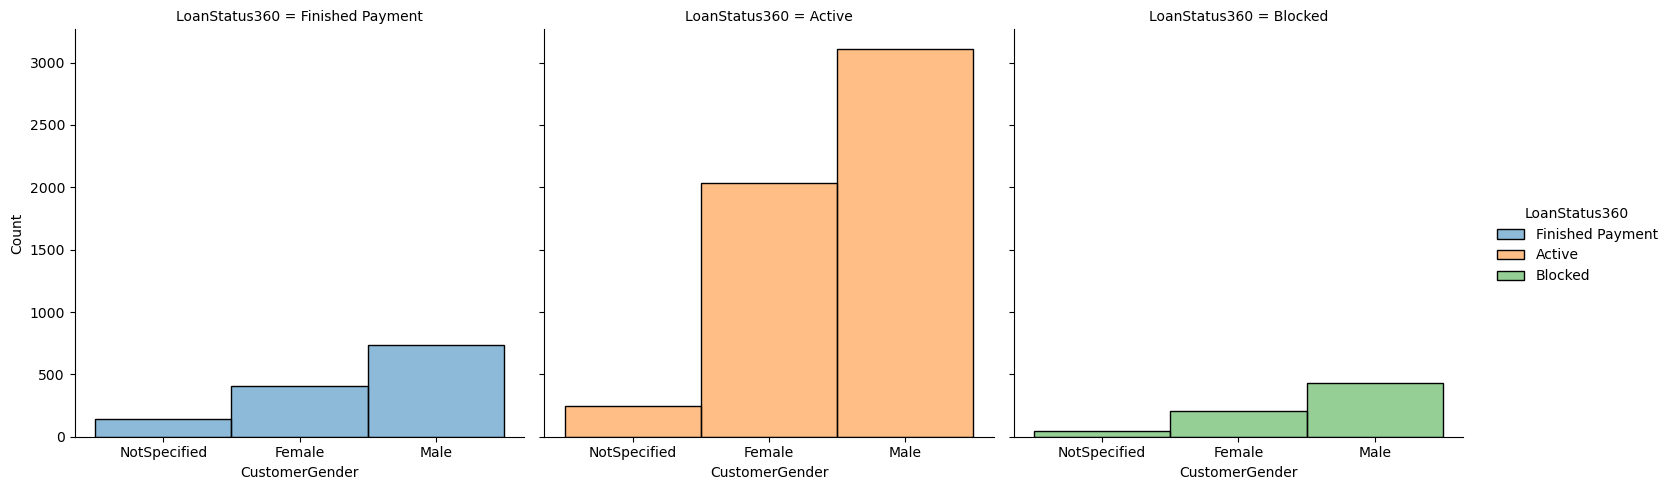

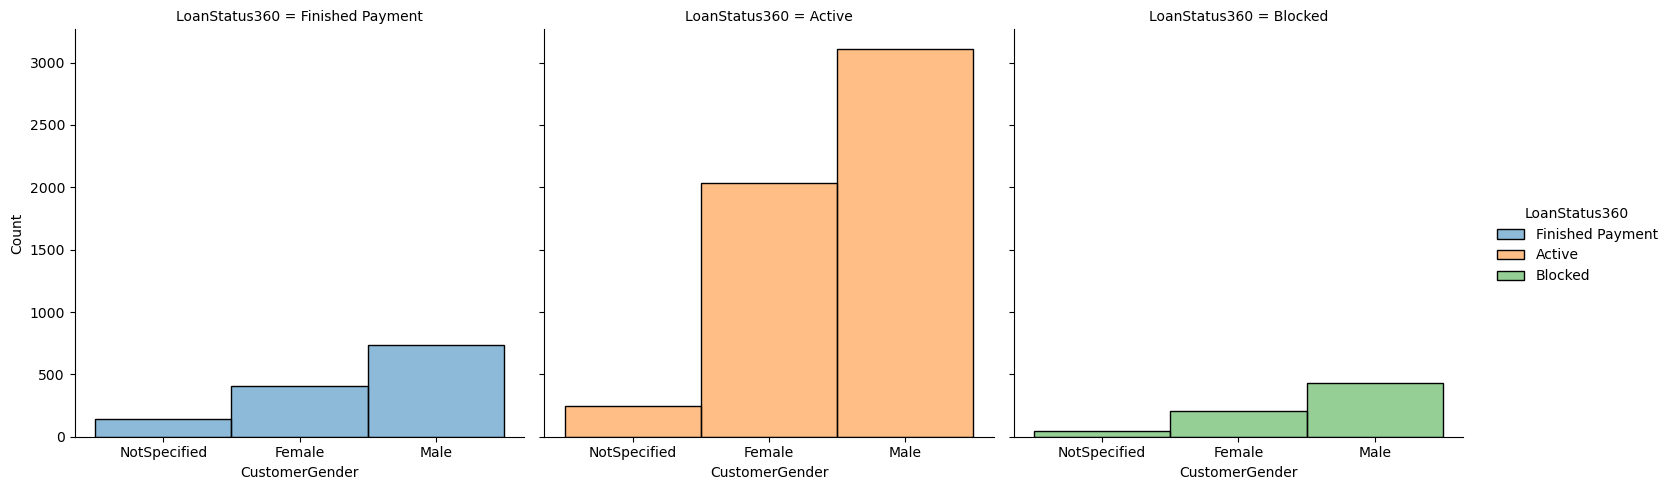

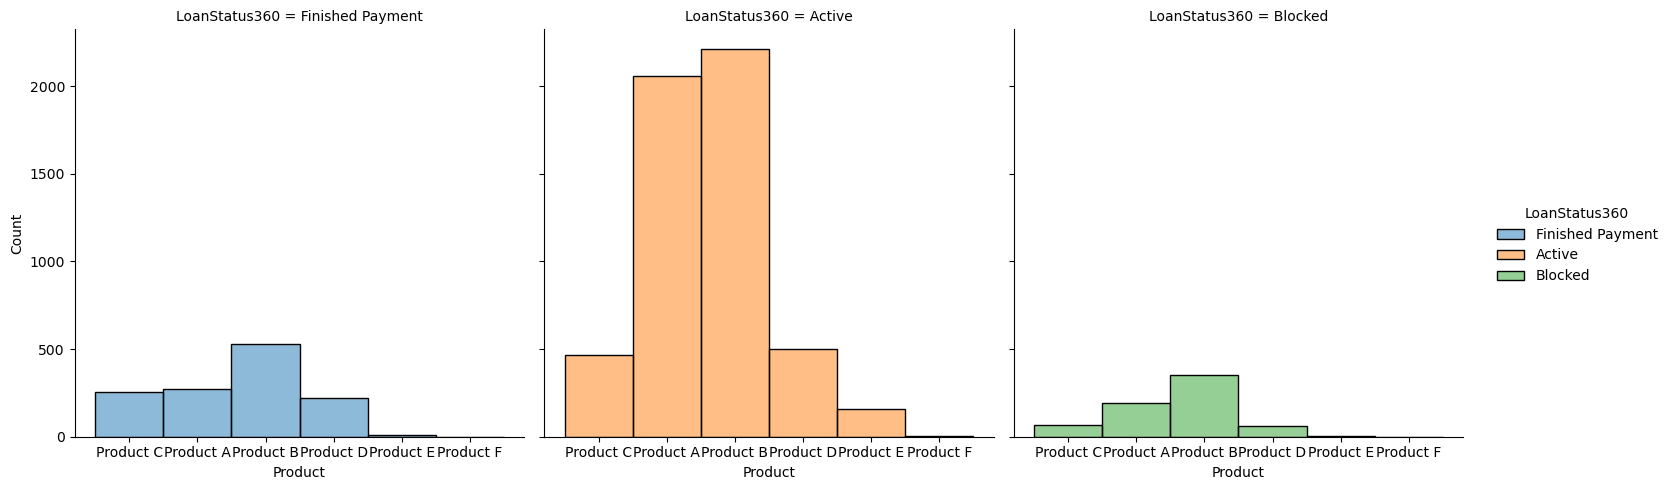

In [22]:
sns.displot(data=df_reg_vis, x='Product', hue='LoanStatus360', col='LoanStatus360');
plt.show()

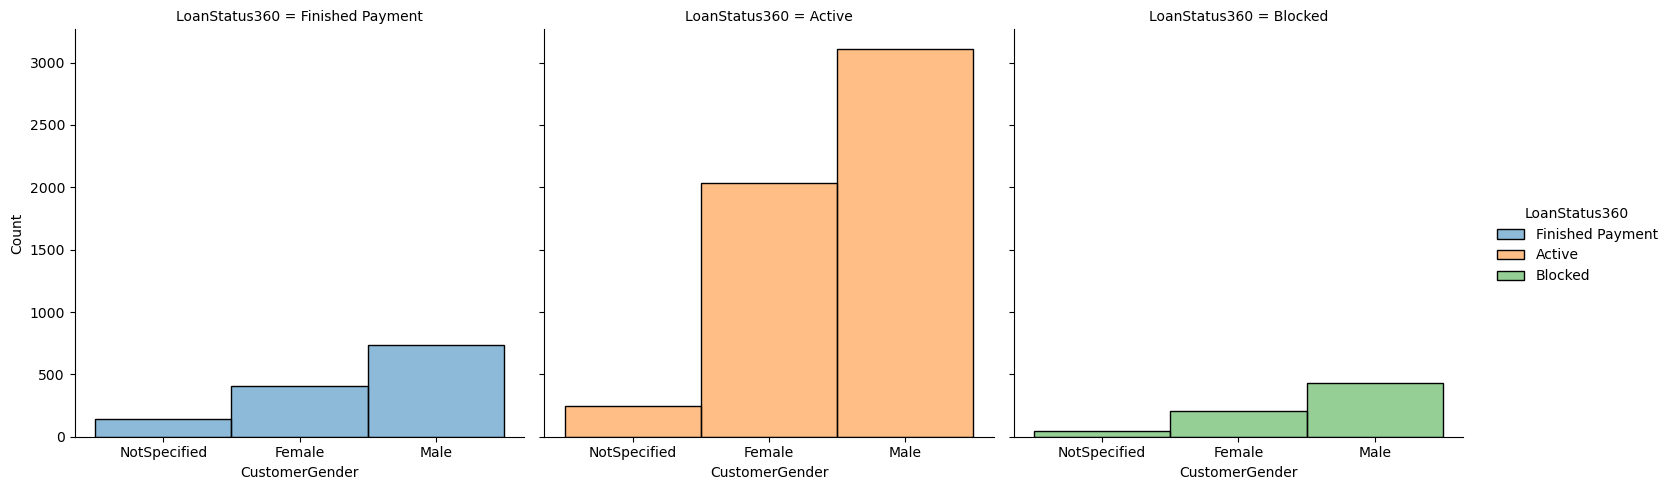

In [23]:
sns.displot(data=df_reg_vis, x='CustomerGender', hue='LoanStatus360', col='LoanStatus360');
plt.show()

In [ ]:
# create a balance column
df_reg_vis['Balance'] = df_reg_vis['TotalPrice'] - df_reg_vis['AmountPaid360']

In [32]:
corr_matrix = df_reg_vis.corr(method='pearson', min_periods=1, numeric_only=True)
corr_matrix['AmountPaid360'].sort_values(ascending=False)

AmountPaid360    1.000000
AmountPaid60     0.754742
TotalPrice       0.684446
AmountPaid30     0.679963
Deposit          0.661609
DailyRate        0.657413
balance         -0.492251
Name: AmountPaid360, dtype: float64

`TotalDays` is not associated with any other column, this means we can drop the column

In [31]:
df_reg_vis = df_reg_vis.drop('TotalDays', axis=1)
df_reg_vis


,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,balance
8649,Product C,NotSpecified,Location 177,Region 1,15600,10/28/2012,1000,40,2250,3250,15600,Finished Payment,0
6367,Product A,Female,Location 67,Region 1,19250,11/11/2015,1000,50,630,2120,14870,Active,4380
5446,Product A,Female,Location 111,Region 6,19250,12/23/2015,1000,50,950,1950,14900,Active,4350
1973,Product B,Male,Location 3,Region 3,16600,9/11/2014,2000,40,3121,4201,10986,Active,5614
3024,Product A,Male,Location 88,Region 7,22250,8/14/2015,4000,50,5350,6850,20900,Active,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,Product A,Female,Location 111,Region 6,19250,8/13/2015,1000,50,120,970,10370,Active,8880
8954,Product A,Male,Location 149,Region 1,22250,5/21/2015,4000,50,5200,6650,22250,Finished Payment,0
8128,Product C,Female,Location 350,Region 6,15600,9/6/2012,1000,40,2470,3331,15600,Finished Payment,0
7048,Product B,Male,Location 73,Region 4,16600,3/18/2014,2000,40,2721,2721,2921,Blocked,13679


In [38]:
# check the date column
df_reg_vis['StartDate'].dtype

dtype('O')

In [39]:
# convert the date column to datetime
df_reg_vis['StartDate'] = pd.to_datetime(df_reg_vis['StartDate'])
df_reg_vis['StartDate'].dtype

dtype('<M8[ns]')

In [40]:
df_reg_vis['StartDate'].head()

8649   2012-10-28
6367   2015-11-11
5446   2015-12-23
1973   2014-09-11
3024   2015-08-14
Name: StartDate, dtype: datetime64[ns]

In [41]:
# split the date column
df_reg_vis['StartYear'] = df_reg_vis['StartDate'].dt.year
df_reg_vis['StartMonth'] = df_reg_vis['StartDate'].dt.month
df_reg_vis['StartDay'] = df_reg_vis['StartDate'].dt.day

df_reg_vis.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,balance,StartYear,StartMonth,StartDay
8649,Product C,NotSpecified,Location 177,Region 1,15600,2012-10-28,1000,40,2250,3250,15600,Finished Payment,0,2012,10,28
6367,Product A,Female,Location 67,Region 1,19250,2015-11-11,1000,50,630,2120,14870,Active,4380,2015,11,11
5446,Product A,Female,Location 111,Region 6,19250,2015-12-23,1000,50,950,1950,14900,Active,4350,2015,12,23
1973,Product B,Male,Location 3,Region 3,16600,2014-09-11,2000,40,3121,4201,10986,Active,5614,2014,9,11
3024,Product A,Male,Location 88,Region 7,22250,2015-08-14,4000,50,5350,6850,20900,Active,1350,2015,8,14


In [42]:
# compare date columns with the target column
df_reg_vis[['StartYear', 'LoanStatus360']].groupby(['StartYear', 'LoanStatus360']).size()

StartYear  LoanStatus360   
2011       Active                 1
           Finished Payment       3
2012       Active               276
           Blocked               43
           Finished Payment     174
2013       Active               628
           Blocked               81
           Finished Payment     283
2014       Active              1549
           Blocked              246
           Finished Payment     358
2015       Active              1902
           Blocked              219
           Finished Payment     376
2016       Active              1038
           Blocked               90
           Finished Payment      89
dtype: int64

In [43]:
df_reg_vis[['StartYear', 'AmountPaid360']].groupby(['StartYear']).mean()

,AmountPaid360
StartYear,
2011,14370.000000
2012,13386.793103
2013,15412.777218
2014,13025.722712
2015,15160.408090
2016,16460.331964


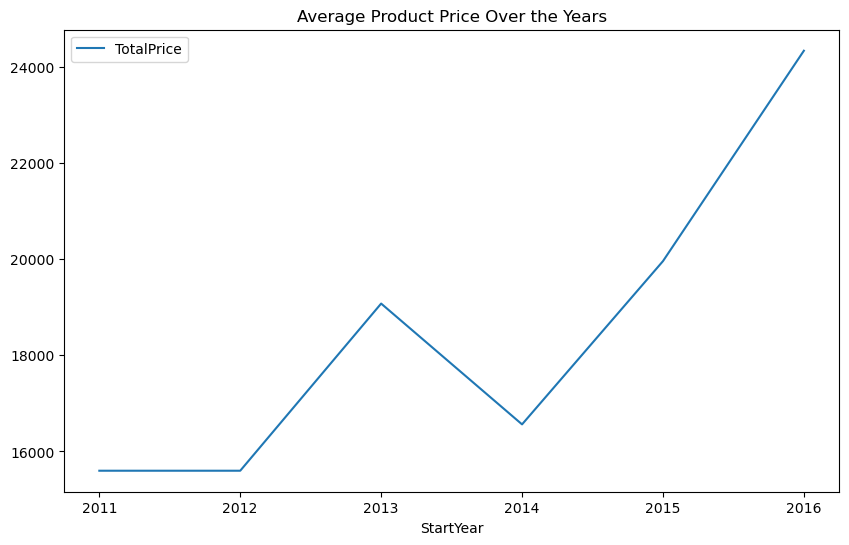

In [47]:
# visualize time series data
df_reg_vis[['StartYear', 'TotalPrice']].groupby(['StartYear']).mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Product Price Over the Years')
plt.show()


In [49]:
# explore the deposit and daily rate columns
df_reg_vis[['Deposit', 'DailyRate']].describe()

,Deposit,DailyRate
count,7356.000000,7356.000000
mean,2312.194127,46.474986
std,1414.420064,13.425254
min,1000.000000,35.000000
25%,2000.000000,40.000000
50%,2000.000000,40.000000
75%,2000.000000,50.000000
max,9000.000000,165.000000


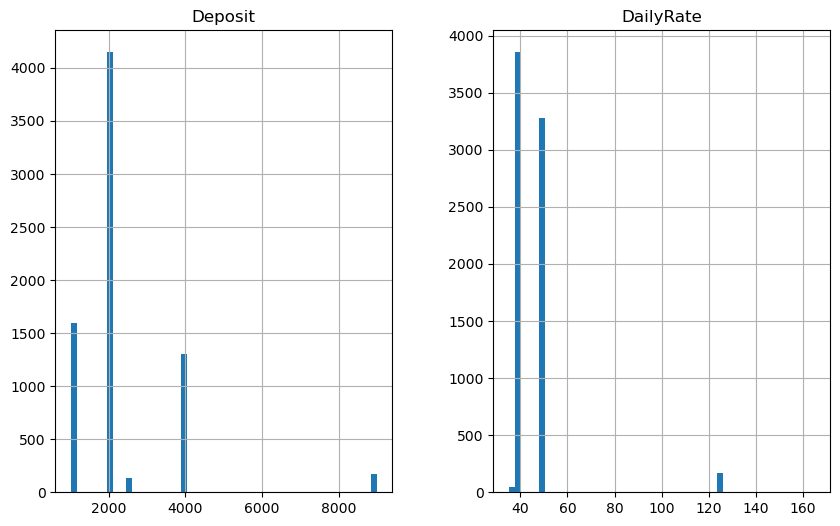

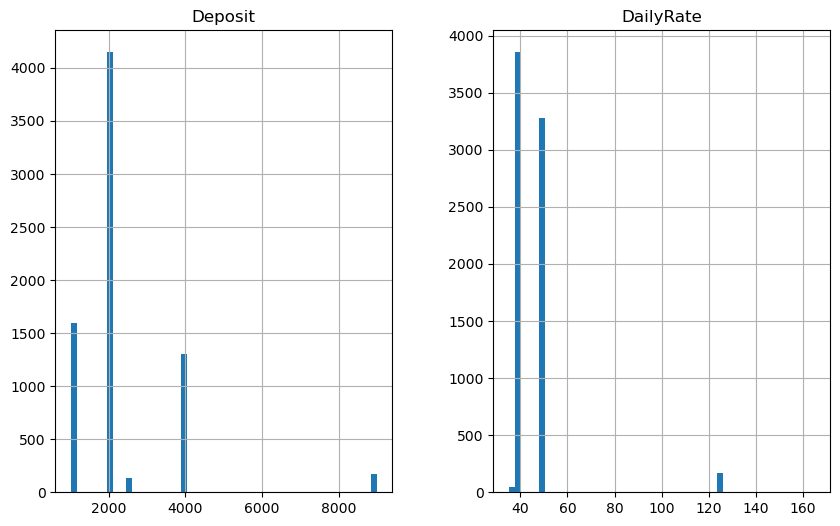

In [53]:
df_reg_vis[['Deposit', 'DailyRate']].hist(bins=50, figsize=(10, 6))
plt.show()

`DailyRate` and `Deposit` columns don't have continues values even though they are numerical, meaning they can be classified as categorical columns

#### Feature Engineering

In [34]:
df_reg_prepared = strat_train_set.drop('AmountPaid360', axis=1)
df_reg_labels = strat_train_set['AmountPaid360'].copy()

In [48]:
df_reg_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7356 entries, 8649 to 1656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         7356 non-null   object
 1   CustomerGender  7356 non-null   object
 2   Location        7356 non-null   object
 3   Region          7356 non-null   object
 4   TotalPrice      7356 non-null   int64 
 5   StartDate       7356 non-null   object
 6   Deposit         7356 non-null   int64 
 7   DailyRate       7356 non-null   int64 
 8   TotalDays       7356 non-null   int64 
 9   AmountPaid30    7356 non-null   int64 
 10  AmountPaid60    7356 non-null   int64 
 11  LoanStatus360   7356 non-null   object
dtypes: int64(6), object(6)
memory usage: 1005.1+ KB


`Categorical columns` are Product, CustomerGender, Location, Region, LoanStatus360, DailyRate, Deposit
`numerical columns` are AmountPaid30, AmountPaid60, AmountPaid360

we'll create a pipeline to handle the categorical columns

In [54]:
df_reg_prepared['Location'].value_counts()

Location
Location 25     234
Location 3      200
Location 6      165
Location 61     142
Location 39     140
               ... 
Location 652      1
Location 513      1
Location 601      1
Location 566      1
Location 776      1
Name: count, Length: 721, dtype: int64

`Location` has too many unique values, encoding it may be bad for our model, we can drop the column

In [55]:
df_reg_prepared = df_reg_prepared.drop(['Location', 'TotalDays'], axis=1)
df_reg_prepared

,Product,CustomerGender,Region,TotalPrice,StartDate,Deposit,DailyRate,AmountPaid30,AmountPaid60,LoanStatus360
8649,Product C,NotSpecified,Region 1,15600,10/28/2012,1000,40,2250,3250,Finished Payment
6367,Product A,Female,Region 1,19250,11/11/2015,1000,50,630,2120,Active
5446,Product A,Female,Region 6,19250,12/23/2015,1000,50,950,1950,Active
1973,Product B,Male,Region 3,16600,9/11/2014,2000,40,3121,4201,Active
3024,Product A,Male,Region 7,22250,8/14/2015,4000,50,5350,6850,Active
...,...,...,...,...,...,...,...,...,...,...
5245,Product A,Female,Region 6,19250,8/13/2015,1000,50,120,970,Active
8954,Product A,Male,Region 1,22250,5/21/2015,4000,50,5200,6650,Finished Payment
8128,Product C,Female,Region 6,15600,9/6/2012,1000,40,2470,3331,Finished Payment
7048,Product B,Male,Region 4,16600,3/18/2014,2000,40,2721,2721,Blocked


In [56]:
df_reg_prepared['StartDate'] = pd.to_datetime(df_reg_prepared['StartDate'])

df_reg_prepared['StartYear'] = df_reg_prepared['StartDate'].dt.year
df_reg_prepared['StartMonth'] = df_reg_prepared['StartDate'].dt.month
df_reg_prepared['StartDay'] = df_reg_prepared['StartDate'].dt.day

df_reg_prepared = df_reg_prepared.drop('StartDate', axis=1)

In [57]:
df_reg_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7356 entries, 8649 to 1656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         7356 non-null   object
 1   CustomerGender  7356 non-null   object
 2   Region          7356 non-null   object
 3   TotalPrice      7356 non-null   int64 
 4   Deposit         7356 non-null   int64 
 5   DailyRate       7356 non-null   int64 
 6   AmountPaid30    7356 non-null   int64 
 7   AmountPaid60    7356 non-null   int64 
 8   LoanStatus360   7356 non-null   object
 9   StartYear       7356 non-null   int32 
 10  StartMonth      7356 non-null   int32 
 11  StartDay        7356 non-null   int32 
dtypes: int32(3), int64(5), object(4)
memory usage: 918.9+ KB


In [59]:
df_reg_num = df_reg_prepared.drop(['Product', 'CustomerGender', 'LoanStatus360', 'Region', 'Deposit', 'DailyRate'], axis=1)
df_reg_num

,TotalPrice,AmountPaid30,AmountPaid60,StartYear,StartMonth,StartDay
8649,15600,2250,3250,2012,10,28
6367,19250,630,2120,2015,11,11
5446,19250,950,1950,2015,12,23
1973,16600,3121,4201,2014,9,11
3024,22250,5350,6850,2015,8,14
...,...,...,...,...,...,...
5245,19250,120,970,2015,8,13
8954,22250,5200,6650,2015,5,21
8128,15600,2470,3331,2012,9,6
7048,16600,2721,2721,2014,3,18


In [60]:
df_reg_cat = df_reg_prepared[['Product', 'CustomerGender', 'Region', 'LoanStatus360', 'Deposit', 'DailyRate']]
df_reg_cat

,Product,CustomerGender,Region,LoanStatus360,Deposit,DailyRate
8649,Product C,NotSpecified,Region 1,Finished Payment,1000,40
6367,Product A,Female,Region 1,Active,1000,50
5446,Product A,Female,Region 6,Active,1000,50
1973,Product B,Male,Region 3,Active,2000,40
3024,Product A,Male,Region 7,Active,4000,50
...,...,...,...,...,...,...
5245,Product A,Female,Region 6,Active,1000,50
8954,Product A,Male,Region 1,Finished Payment,4000,50
8128,Product C,Female,Region 6,Finished Payment,1000,40
7048,Product B,Male,Region 4,Blocked,2000,40


In [ ]:
# create num pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [62]:
# create full pipeline
cat_attribs = ['Product', 'CustomerGender', 'Region', 'LoanStatus360', 'Deposit', 'DailyRate']
num_attribs = list(df_reg_num)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

df_reg_prepared = full_pipeline.fit_transform(df_reg_prepared)

In [64]:
df_reg_prepared.toarray()

array([[-0.60518179, -0.53758284, -0.54249141, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00420914, -1.19729169, -0.95793816, ...,  1.        ,
         0.        ,  0.        ],
       [-0.00420914, -1.06697883, -1.020439  , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.60518179, -0.44799275, -0.5127116 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.44053175, -0.3457786 , -0.73697932, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44053175, -0.31360761, -0.36969497, ...,  0.        ,
         0.        ,  0.        ]], shape=(7356, 47))

In [67]:
# training and evaluation on the training set

# models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()
svm_reg = SVR()

# linear regression
lin_reg.fit(df_reg_prepared, df_reg_labels)
lin_reg_predictions = lin_reg.predict(df_reg_prepared)
lin_reg_mse = mean_squared_error(df_reg_labels, lin_reg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

np.float64(3196.130881494026)

In [72]:
# linear regressor validation
lin_reg_scores = cross_val_score(lin_reg, df_reg_prepared, df_reg_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_rmse_scores)

Scores: [3198.52531281 3114.93071698 3386.49865051 3343.49859794 3100.8931914
 3276.69034099 3309.87335635 3224.4732231  3229.85076734 3155.7724411 ]
Mean: 3234.1006598511144
Standard deviation: 90.66741869049217


In [69]:
# decision tree
tree_reg.fit(df_reg_prepared, df_reg_labels)
tree_reg_predictions = tree_reg.predict(df_reg_prepared)
tree_reg_mse = mean_squared_error(df_reg_labels, tree_reg_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

np.float64(13.850754244749643)

In [ ]:
# tree regressor validation
scores = cross_val_score(tree_reg, df_reg_prepared, df_reg_labels, scoring='neg_mean_squared_error', cv=10)
tree_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

display_scores(tree_reg_rmse_scores)

Scores: [3543.46480372 3783.4010741  3606.73000517 3734.37780944 3785.73136331
 3586.87083447 3949.97053567 3344.77013436 3579.65249311 3554.82992542]
Mean: 3646.979897876233
Standard Deviation: 160.50180501332085


In [ ]:
# random forest regressor
forest_reg.fit(df_reg_prepared, df_reg_labels)
forest_reg_predictions = forest_reg.predict(df_reg_prepared)
forest_reg_mse = mean_squared_error(df_reg_labels, forest_reg_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

In [73]:
# forest regressor validation
scores = cross_val_score(forest_reg, df_reg_prepared, df_reg_labels, scoring='neg_mean_squared_error', cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

display_scores(forest_reg_rmse_scores)

Scores: [2693.95666098 2653.98336968 2674.20319434 2865.13859214 2660.29057636
 2639.52374985 2935.96593417 2554.73303599 2496.38733453 2674.04452307]
Mean: 2684.822697111193
Standard Deviation: 123.26200111105192


In [74]:
# support vector machine regressor
svm_reg.fit(df_reg_prepared, df_reg_labels)
svm_reg_predictions = svm_reg.predict(df_reg_prepared)
svm_reg_mse = mean_squared_error(df_reg_labels, svm_reg_predictions)
svm_reg_rmse = np.sqrt(svm_reg_mse)
svm_reg_rmse

np.float64(6599.7062867855275)

In [75]:
# SVR validation
scores = cross_val_score(svm_reg, df_reg_prepared, df_reg_labels, scoring='neg_mean_squared_error', cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

display_scores(svm_reg_rmse_scores)

Scores: [6568.56680941 6707.85931029 6538.78294596 6735.59345446 6507.30749546
 5966.3764414  6852.1455507  6646.83823865 6652.6857754  6867.72295763]
Mean: 6604.387897935488
Standard Deviation: 241.8378669936503


`Random Forest Regressor` performs best among the three other models, we can try and make it better by tuning its hyperparameters

In [77]:
# fine tuning forest regressor
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid,
                            cv=5, scoring='neg_mean_squared_error', 
                            return_train_score=True,
                            verbose=2)
grid_search.fit(df_reg_prepared, df_reg_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.7s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.5s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.4s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.3s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   1.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   1.2s
[CV] END ....................max_features=2, n_estimators=10; total time=   1.5s
[CV] END ....................max_features=2, n_estimators=10; total time=   1.8s
[CV] END ....................max_features=2, n_estimators=10; total time=   1.4s
[CV] END ....................max_features=2, n_estimators=30; total time=   5.3s
[CV] END ....................max_features=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [78]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [81]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3256.5236738025737 {'max_features': 2, 'n_estimators': 3}
2966.748313969735 {'max_features': 2, 'n_estimators': 10}
2881.2771049890257 {'max_features': 2, 'n_estimators': 30}
3245.7396118350825 {'max_features': 4, 'n_estimators': 3}
2853.2316632386023 {'max_features': 4, 'n_estimators': 10}
2760.1130553891107 {'max_features': 4, 'n_estimators': 30}
3157.9963965290794 {'max_features': 6, 'n_estimators': 3}
2816.9280611852 {'max_features': 6, 'n_estimators': 10}
2761.227759749901 {'max_features': 6, 'n_estimators': 30}
3097.7540495825347 {'max_features': 8, 'n_estimators': 3}
2787.6237297629095 {'max_features': 8, 'n_estimators': 10}
2688.201439853302 {'max_features': 8, 'n_estimators': 30}
3269.259694417465 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3009.7085884426697 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3339.4860460408786 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2961.2190353682754 {'bootstrap': False, 'max_features': 3, 'n_estima

In [82]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.25383822e-01, 1.78717033e-01, 2.31952836e-01, 9.45478185e-03,
       2.40409340e-02, 3.27288138e-02, 3.14179562e-03, 3.25023079e-03,
       1.82476346e-03, 1.83916078e-03, 9.79123024e-02, 1.90166493e-04,
       3.34784316e-03, 2.99385039e-03, 6.26559515e-04, 3.26131774e-03,
       3.05140748e-04, 7.43925295e-05, 9.90982601e-05, 9.90521820e-04,
       6.84384300e-04, 9.45225834e-05, 7.33366801e-05, 3.85289902e-05,
       5.27223220e-05, 3.15590971e-03, 3.57223940e-03, 2.01603550e-03,
       5.90603433e-04, 4.01462201e-03, 2.34992575e-03, 1.51968953e-04,
       8.15722746e-05, 3.10955264e-02, 8.92958986e-02, 3.37437689e-02,
       8.18464072e-03, 2.92227781e-03, 5.85007210e-04, 9.90581964e-03,
       3.04893716e-04, 4.41505233e-02, 9.54644072e-04, 5.74453700e-03,
       1.61953833e-02, 1.61463630e-02, 1.75898064e-03])

In [83]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.2319528363193027), 'AmountPaid60'),
 (np.float64(0.17871703258267846), 'AmountPaid30'),
 (np.float64(0.12538382161248013), 'TotalPrice'),
 (np.float64(0.09791230235763407), 'Product E'),
 (np.float64(0.032728813762217215), 'StartDay'),
 (np.float64(0.02404093400986381), 'StartMonth'),
 (np.float64(0.009454781854670295), 'StartYear'),
 (np.float64(0.0032502307879344657), 'Product B'),
 (np.float64(0.0031417956183190797), 'Product A'),
 (np.float64(0.0018391607841392091), 'Product D'),
 (np.float64(0.0018247634598862583), 'Product C'),
 (np.float64(0.00019016649289897938), 'Product F')]

In [88]:
strat_test_set["StartDate"] = pd.to_datetime(strat_test_set["StartDate"])
strat_test_set['StartYear'] = strat_test_set['StartDate'].dt.year
strat_test_set['StartMonth'] = strat_test_set['StartDate'].dt.month
strat_test_set['StartDay'] = strat_test_set['StartDate'].dt.day

In [89]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('AmountPaid360', axis=1)
y_test = strat_test_set['AmountPaid360'].copy()

In [90]:
X_test_prepared = full_pipeline.transform(X_test)

In [92]:
X_test_prepared.toarray()

array([[ 4.89740985e-01,  8.87714062e-01,  8.91351370e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.05181795e-01,  7.85907140e-01,  2.84725578e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.20914089e-03, -1.63709759e+00, -1.90280379e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.60440901e-01, -1.12765576e+00, -1.25904515e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.22417671e+00,  9.13448194e+00,  1.05793491e+01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 4.89740985e-01,  7.45184371e-01,  7.81055771e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(1839, 47))

In [94]:
final_reg_predictions = final_model.predict(X_test_prepared)
final_reg_mse = mean_squared_error(y_test, final_reg_predictions)
final_reg_rmse = np.sqrt(final_reg_mse)
final_reg_rmse

np.float64(2587.5678248163777)

In [97]:
# check confidence interval
confidence_interval = 0.95
squared_errors = (final_reg_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence_interval, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2448.49189974, 2719.54075405])

#### CLASSIFICATION

In [98]:
strat_train_set.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
8649,Product C,NotSpecified,Location 177,Region 1,15600,10/28/2012,1000,40,365,2250,3250,15600,Finished Payment
6367,Product A,Female,Location 67,Region 1,19250,11/11/2015,1000,50,365,630,2120,14870,Active
5446,Product A,Female,Location 111,Region 6,19250,12/23/2015,1000,50,365,950,1950,14900,Active
1973,Product B,Male,Location 3,Region 3,16600,9/11/2014,2000,40,365,3121,4201,10986,Active
3024,Product A,Male,Location 88,Region 7,22250,8/14/2015,4000,50,365,5350,6850,20900,Active


In [102]:
strat_train_set['StartDate'] = pd.to_datetime(strat_train_set['StartDate'])
strat_train_set['StartYear'] = strat_train_set['StartDate'].dt.year
strat_train_set['StartMonth'] = strat_train_set['StartDate'].dt.month
strat_train_set['StartDay'] = strat_train_set['StartDate'].dt.day

strat_train_set = strat_train_set.drop('StartDate', axis=1)

In [108]:
strat_test_set = strat_test_set.drop('StartDate', axis=1)

In [109]:
strat_test_set.shape

(1839, 15)

In [110]:
strat_test_set.head()

,Product,CustomerGender,Location,Region,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,StartYear,StartMonth,StartDay
4493,Product A,Female,Location 22,Region 6,22250,4000,50,365,5750,7150,21500,Active,2015,5,24
3763,Product C,Female,Location 27,Region 2,15600,1000,40,365,5500,5500,10680,Active,2013,3,10
6871,Product A,Male,Location 18,Region 7,19250,1000,50,365,-450,-450,-450,Blocked,2015,12,10
3452,Product A,Male,Location 22,Region 6,22250,4000,50,365,5300,7000,16880,Active,2016,2,18
4551,Product B,Male,Location 44,Region 1,16600,2000,40,365,3481,4321,15280,Active,2015,1,10


In [111]:
df_class_prepared = strat_train_set.drop('LoanStatus360', axis=1)
df_class_labels = strat_train_set['LoanStatus360'].copy()

In [112]:
df_class_prepared_cat = df_class_prepared[['Product', 'CustomerGender', 'Region', 'Deposit', 'DailyRate']]
df_class_prepared_num = df_class_prepared.drop(['Product', 'CustomerGender', 'Region', 'Deposit', 'DailyRate', 'Location'], axis=1)

In [113]:
# create pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [114]:
# full pipeline
cat_attribs = ['Product', 'CustomerGender', 'Region', 'Deposit', 'DailyRate']
num_attribs = list(df_class_prepared_num)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

df_class_prepared = full_pipeline.fit_transform(df_class_prepared)

In [115]:
df_class_prepared.toarray()

array([[ 5.06018346e-01,  0.00000000e+00,  8.15581290e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.07882376e-01,  0.00000000e+00,  7.19765892e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.50674221e-03,  0.00000000e+00, -1.56064057e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.71010610e-01,  0.00000000e+00, -1.08118032e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.37451254e+00,  0.00000000e+00,  8.57701176e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.06018346e-01,  0.00000000e+00,  6.81439733e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(1839, 45))

In [118]:
# preprocess labels
le = LabelEncoder()
df_class_labels = le.fit_transform(df_class_labels)
df_class_labels

array([0, 0, 1, ..., 1, 0, 0], shape=(1839,))

In [119]:
# models
log_reg = LogisticRegression()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
svm_clf = SVC()

# logistic regression
log_reg.fit(df_class_prepared, df_class_labels)
log_reg_predictions = log_reg.predict(df_class_prepared)
log_reg_score = log_reg.score(df_class_prepared, df_class_labels)
log_reg_score

0.9037520391517129

In [120]:
# decision tree
tree_clf.fit(df_class_prepared, df_class_labels)
tree_clf_predictions = tree_clf.predict(df_class_prepared)
tree_clf_score = tree_clf.score(df_class_prepared, df_class_labels)
tree_clf_score

1.0

In [121]:
# random forest
forest_clf.fit(df_class_prepared, df_class_labels)
forest_clf_predictions = forest_clf.predict(df_class_prepared)
forest_clf_score = forest_clf.score(df_class_prepared, df_class_labels)
forest_clf_score

1.0

In [122]:
# svc
svm_clf.fit(df_class_prepared, df_class_labels)
svm_clf_predictions = svm_clf.predict(df_class_prepared)
svm_clf_score = svm_clf.score(df_class_prepared, df_class_labels)
svm_clf_score

0.8297988036976618